<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1></h2><h3>Regression Problem</h3></th>
    </tr>
</table>

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/ML_Python/Assignment_student' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd



Mounted at /content/gdrive
/content/gdrive/My Drive/ML_Python/Assignment_student


In [ ]:
import csv
students =[]
with open('name.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        students.append({"name": row["name"], "home": row["home"]})

for student in sorted(students, key=lambda student: student['name']):
    print(f"{student['name']} is from {student['home']}")

FileNotFoundError: [Errno 2] No such file or directory: 'name.csv'

## Objectives
##### After completing this assignment, you should be able to independently:
1. Build Supervised Machine Learning Models to solve regression problem
2. Select, Train and Evaluate the models
3. Fine-tuning model hyperparameters using grid search or other suitable methods
4. Use the model to make predictions

## Problem Statement

### Regression Problem: House Price Prediction
The second problem assigned to you is to predict the house price in Washington based on the house condition, location and other relevant information. Please refer to the files `house_price.csv` and `data_dictionary.xlsx` for more information.

## Dataset

You will need the following files for this assignment:
1. house_price.csv
2. data_dictionary.xlsx

## Instructions
Based on what you have learnt in the course,
1. Build the supervised machine learning models for the assigned problems
2. Select, Train and Evaluate the models
3. Shortist a few (two to five) promissing models and fine-tuning model hyperparameters
4. Compare the shortlisted models and recommend the best model
5. Use the best model to make prediction on the test data
5. Save the model as a "pickle" file for future deployment

The template below has been provided to guide you in the training of your Supervised Machine Learning models. Feel free to **add in more cells** and include more steps where necessary to achieve the goal of the assignment.

## Regression Problem: Housing Price Prediction

### Step 1: Import Data and Perform Data Preparation

In [ ]:
# Enter your code here:

# Import the requried packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer


# Loading the data

house1 = pd.read_csv('house_price.csv')
house1.info()

house = house1.drop(['country'], axis=1)
print(house.head())

house_price = house.select_dtypes(['object']).copy()
for col in house_price:
    print(col, ':')
    codes, uniques = pd.factorize(house_price[col], sort=True)
    house[col]=codes
    print(uniques)
print(house.head())

# Set the "deposit" as target/model output and the rest features as model inputs
y = house['price']
X = house.drop(['price','yr_renovated', 'date', 'condition', 'street', 'statezip', 'bathrooms','sqft_above','floors', 'bedrooms', 'sqft_lot', 'view','waterfront','sqft_basement'], axis=1)

X_new = QuantileTransformer().fit_transform(X)
X_neww = pd.DataFrame(X_new, index= house.index, columns=['sqft_living', 'yr_built' ,'city' ])

#columns = ['price','yr_renovated', 'date', 'condition', 'street', 'statezip', 'bathrooms','sqft_above','floors','sqft_living', 'sqft_lot', 'yr_built', 'waterfront', 'view', 'bedrooms']

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_neww, y, test_size=0.2, random_state=2)


#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2511 non-null   object 
 1   price          2511 non-null   float64
 2   bedrooms       2511 non-null   float64
 3   bathrooms      2511 non-null   float64
 4   sqft_living    2511 non-null   int64  
 5   sqft_lot       2511 non-null   int64  
 6   floors         2511 non-null   float64
 7   waterfront     2511 non-null   int64  
 8   view           2511 non-null   int64  
 9   condition      2511 non-null   int64  
 10  sqft_above     2511 non-null   int64  
 11  sqft_basement  2511 non-null   int64  
 12  yr_built       2511 non-null   int64  
 13  yr_renovated   2511 non-null   int64  
 14  street         2511 non-null   object 
 15  city           2511 non-null   object 
 16  statezip       2511 non-null   object 
 17  country        2511 non-null   object 
dtypes: float

In [ ]:
house.loc[:,'condition']

0       3
1       4
2       4
3       3
4       3
       ..
2506    3
2507    4
2508    3
2509    3
2510    4
Name: condition, Length: 2511, dtype: int64

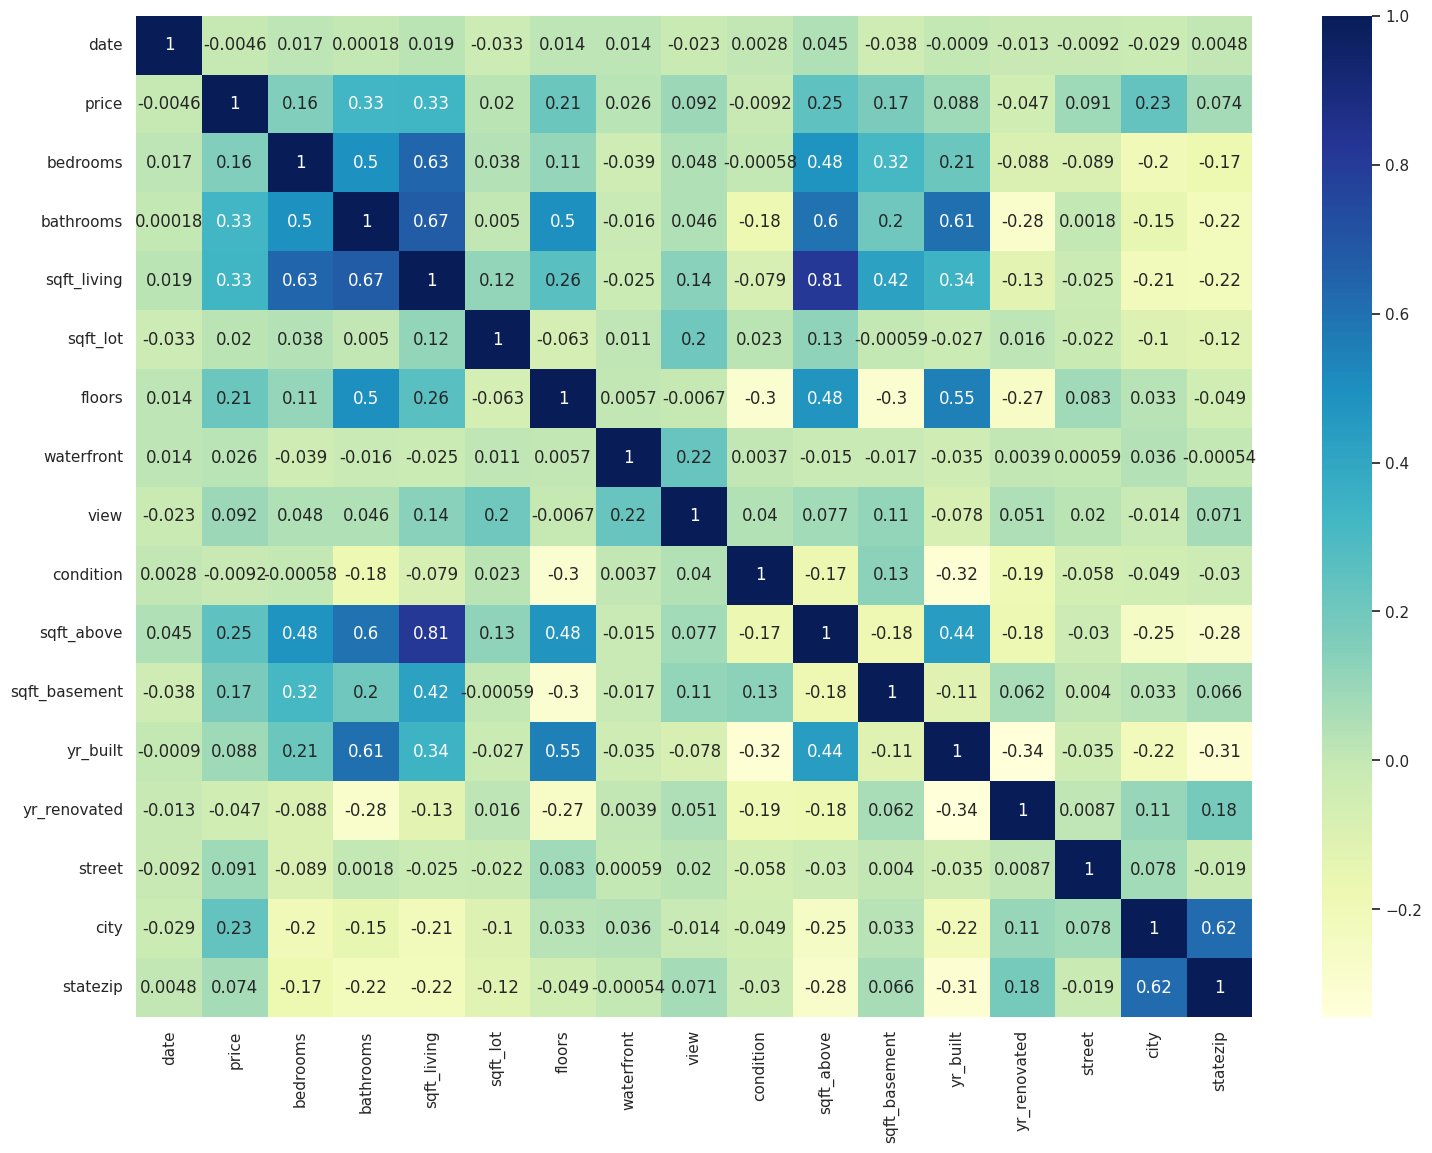

In [ ]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(18,13)})
house1 = house.corr(method = 'pearson')
sns.heatmap(house1,annot =True, cmap='YlGnBu')
plt.show()




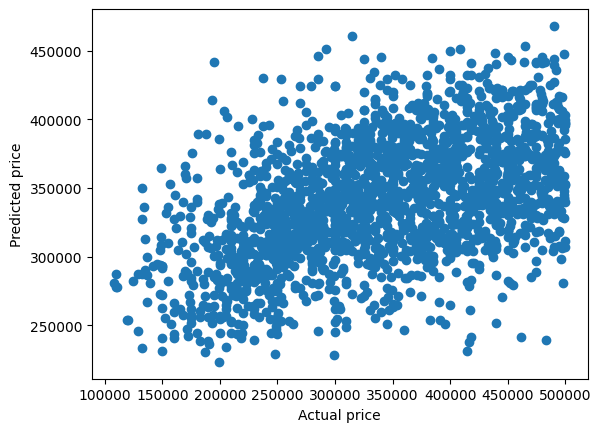

In [ ]:
# Model 1: #Linear Regression Model
# Concept: y_pred_train = Mx_train + c
# Using train data and visualization
lm_reg = linear_model.LinearRegression()
lm_reg.fit(X_train, y_train)
prediction = lm_reg.predict(X_train)
lm_reg.fit(X_train, y_train)
plt.scatter(y_train, prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
import seaborn as sns
sns.lmplot(data = house, X_test= 'actual price', y_test = 'prediction')

TypeError: lmplot() got an unexpected keyword argument 'X_test'

In [ ]:
#Evaluation for train_data & Visualize y_train & y_train_pred
print(lm_reg.intercept_)
print(lm_reg.coef_)

340634.54420735256
[-5998.69291182 42264.60058202 -8881.57003245  2084.26653347
  4047.80109476  3495.21487678  1685.98429673 26845.30798194]


In [ ]:
#training mean absolute error
lm_train_mae = mean_absolute_error(lm_reg.predict(X_train), y_train)
print('Linear Regression mean absolute error: ', lm_train_mae)

#testing mean absolute error
lm_test_mae = mean_absolute_error(lm_reg.predict(X_test), y_test)
print('Linear Regression mean absolute error: ', lm_test_mae)


Linear Regression mean absolute error:  67287.54778703909
Linear Regression mean absolute error:  68839.0981198523


In [ ]:
lm_train_score = lm_reg.score(X_train, y_train)
print('Linear Regression Score: ', lm_train_score)

lm_test_score = lm_reg.score(X_test, y_test)
print('Linear Regression Score: ', lm_test_score)


Linear Regression Score:  0.2275886505645902
Linear Regression Score:  0.25005066900382844


### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fining the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells.

In [ ]:
#Model 2: KNN using Grid Search
#scoring='neg_mean_squared_error'
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.ensemble import IsolationForest
from collections import Counter
rf_reg = neighbors.KNeighborsRegressor()
param_grid = {"n_neighbors": [18,20,21,22, 23,25,30]}
knn_grid_reg = GridSearchCV(rf_reg,
                      param_grid=param_grid,
                      cv= 5,
                      n_jobs=-1)
knn_grid_reg.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [18, 20, 21, 22, 23, 25, 30]})

In [ ]:
print(knn_grid_reg.best_score_)
print(knn_grid_reg.best_params_)
print(knn_grid_reg.best_estimator_)

0.2687241882636724
{'n_neighbors': 25}
KNeighborsRegressor(n_neighbors=25)


In [ ]:
#Final Model
knn_grid = knn_grid_reg.best_estimator_
knn_grid_reg.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [18, 20, 21, 22, 23, 25, 30]})

In [ ]:
#training mean absolute error
knn_grid_train_mae = mean_absolute_error(knn_grid_reg.predict(X_train), y_train)
print('K Nearest Neighbors mean absolute error: ', knn_grid_train_mae)

#testing mean absolute error
knn_grid_test_mae = mean_absolute_error(knn_grid_reg.predict(X_test), y_test)
print('K Nearest Neighbors mean absolute error: ', knn_grid_test_mae)

K Nearest Neighbors mean absolute error:  61575.05684127351
K Nearest Neighbors mean absolute error:  66356.14804824357


In [ ]:
knn_grid_train_score = knn_grid.score(X_train, y_train)
print('K Nearest Neighborsn Score: ', knn_grid_train_score)

knn_grid_test_score = knn_grid.score(X_test, y_test)
print('K Nearest Neighbors Score: ', knn_grid_test_score)


K Nearest Neighborsn Score:  0.3278962273849094
K Nearest Neighbors Score:  0.26130233327119823


In [ ]:
# Model 2: K Nearest Neighbors Model using Iteration
#3 + np.argmin(test_mae)
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=3) # set as three nearest neighbors
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print('train_mae:', mean_absolute_error(knn_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(knn_reg.predict(X_test), y_test))

train_mae: 44506.8544246182 
 test_mae: 62286.979565413516


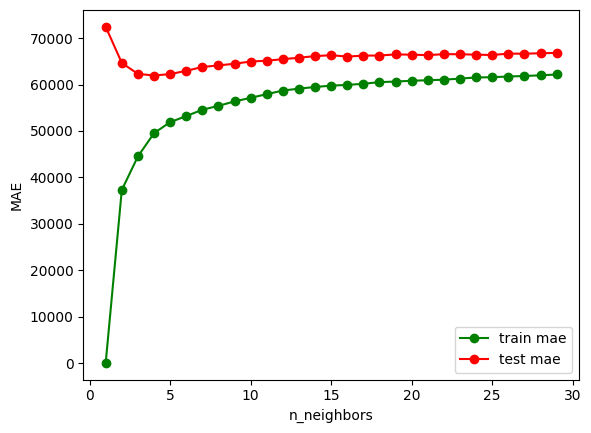

In [ ]:
train_mae = []
test_mae = []

neighbors_settings = range(1,30) # ranges from 3 to 30
for n_neighbors in neighbors_settings:
    # build the model
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    # record training mae
    train_mae.append(mean_absolute_error(knn_reg.predict(X_train), y_train))
    # record test mae
    test_mae.append(mean_absolute_error(knn_reg.predict(X_test), y_test))

plt.plot(neighbors_settings, train_mae, 'go-', label="train mae")
plt.plot(neighbors_settings, test_mae, 'ro-', label="test mae")
plt.ylabel("MAE")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
#K Nearest Neighbors Final Model
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
#training mean absolute error
knn_train_mae = mean_absolute_error(knn_reg.predict(X_train), y_train)
print('K Nearest Neighbors mean absolute error: ', knn_train_mae)

#testing mean absolute error
knn_test_mae = mean_absolute_error(knn_reg.predict(X_test), y_test)
print('K Nearest Neighbors mean absolute error: ', knn_test_mae)

K Nearest Neighbors mean absolute error:  51890.470232743915
K Nearest Neighbors mean absolute error:  62246.158473835785


In [ ]:
# R squared value
knn_train_score = knn_reg.score(X_train, y_train)
print('K Nearest Neighborsn Score: ', knn_train_score)

knn_test_score = knn_reg.score(X_test, y_test)
print('K Nearest Neighbors Score: ', knn_test_score)


K Nearest Neighborsn Score:  0.49986843699480366
K Nearest Neighbors Score:  0.28873412880930915


In [ ]:
# Model 3: SVM Model
# Use GridSearch to find the best combination of model hyperparameters
svm_reg = svm.SVR()
param_grid = {"kernel": [ 'linear', 'rbf', 'poly'],
              "C": [10000,20000,30000],
              'epsilon': [30000,50000,60000],
              "gamma" : [0.1,0.3,0.5],
              "degree" : [1,2,3]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train)




GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10000, 20000, 30000], 'degree': [1, 2, 3],
                         'epsilon': [30000, 50000, 60000],
                         'gamma': [0.1, 0.3, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-6061281505.840199
{'C': 30000, 'degree': 1, 'epsilon': 50000, 'gamma': 0.3, 'kernel': 'rbf'}
SVR(C=30000, degree=1, epsilon=50000, gamma=0.3)


In [ ]:
#Final Model
svm_reg = gs_reg.best_estimator_
svm_reg.fit(X_train, y_train)

SVR(C=30000, degree=1, epsilon=50000, gamma=0.3)

In [ ]:
#training mean absolute error
svm_train_mae = mean_absolute_error(svm_reg.predict(X_train), y_train)
print('SVM mean absolute error: ', svm_train_mae)

#testing mean absolute error
svm_test_mae = mean_absolute_error(svm_reg.predict(X_test), y_test)
print('SVM mean absolute error: ', svm_test_mae)

SVM mean absolute error:  59429.71803834975
SVM mean absolute error:  65586.85247732887


In [ ]:
# R squared value
svm_train_score = svm_reg.score(X_train, y_train)
print('svm Score: ', svm_train_score)

svm_test_score = svm_reg.score(X_test, y_test)
print('svm Score: ', svm_test_score)

svm Score:  0.36817420293697845
svm Score:  0.2753833466368226


In [ ]:
print(svm_reg.score(X_train, y_train))
print(svm_reg.score(X_test, y_test))

0.3907256801355562
0.2791972146138427


In [ ]:
# Model 3: Decision Tree Model
dt_reg = tree.DecisionTreeRegressor(criterion = 'squared_error', max_depth=3)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

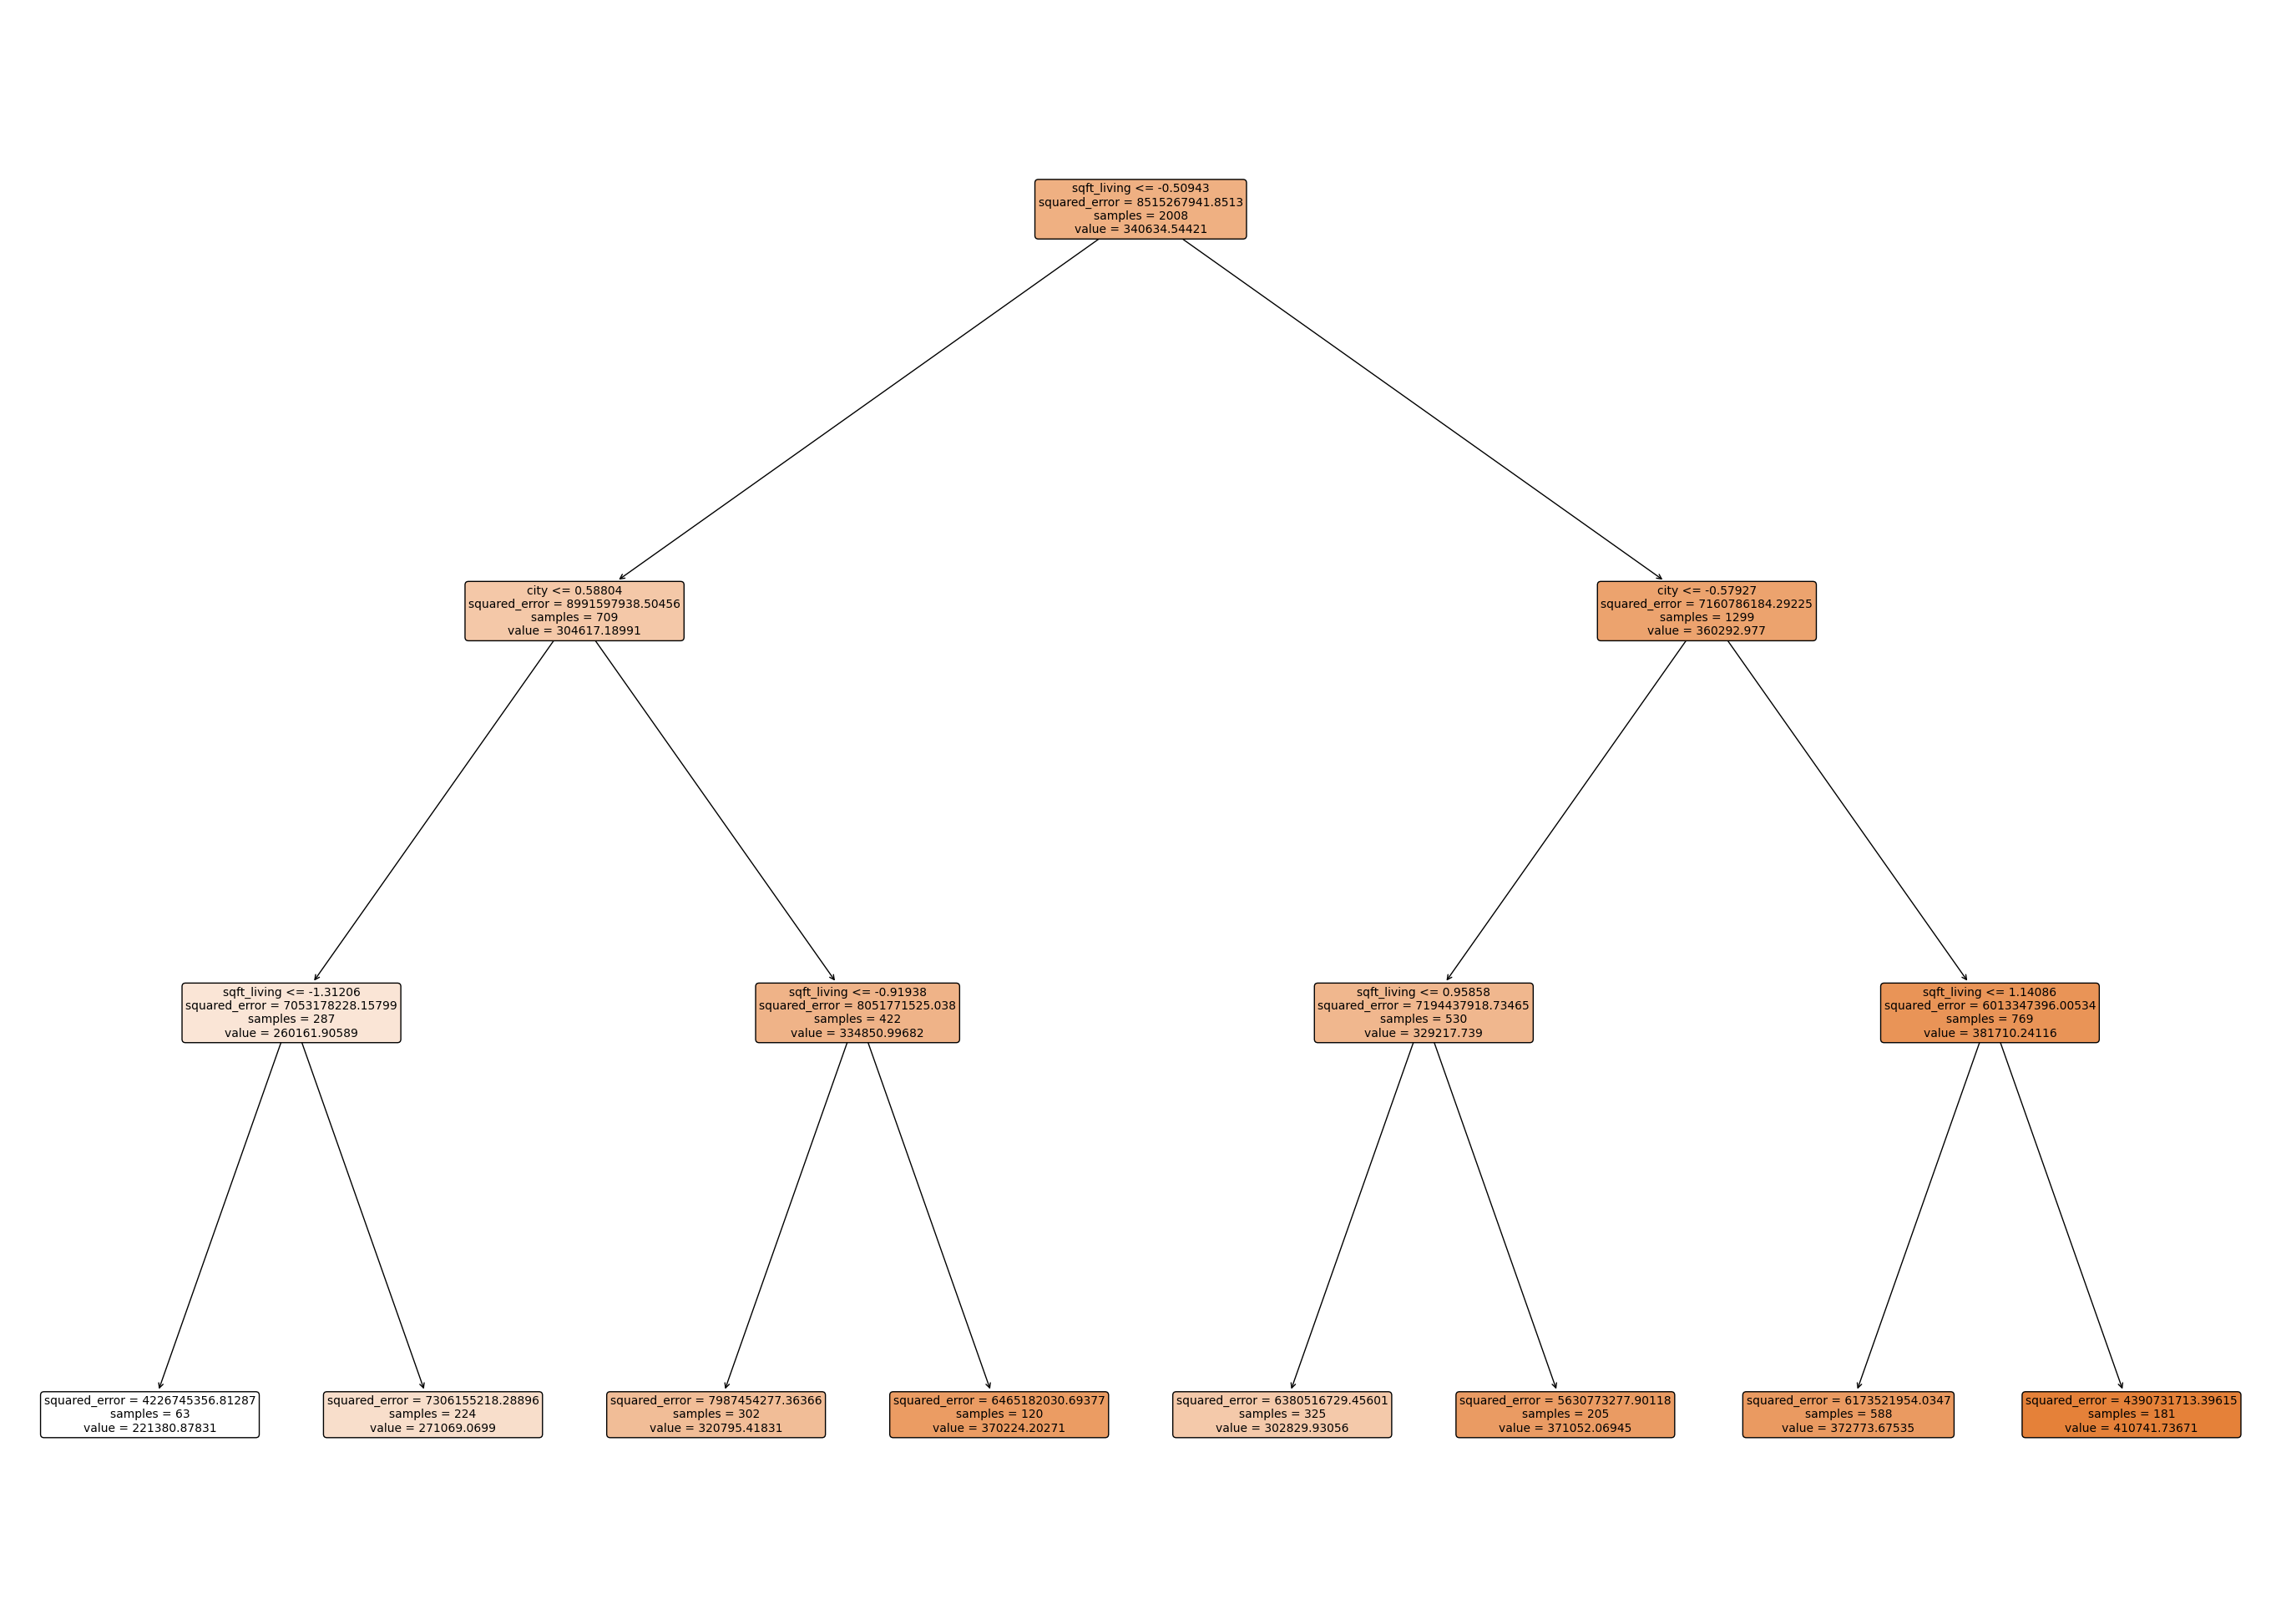

In [ ]:
plt.figure(figsize=(35,25))
tree.plot_tree(dt_reg,
               feature_names = X_train.columns,
               rounded = True,
               filled= True,
               precision = 5,
               fontsize =10)
plt.show()

In [ ]:
param_grid = {"criterion" : ["squared_error", "friedman_mse"],
              'max_depth' : [3,4,5,6,7,8,9,10]}

gs_reg = GridSearchCV(dt_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)

gs_reg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-6219837580.589681
{'criterion': 'squared_error', 'max_depth': 5}
DecisionTreeRegressor(max_depth=5)


In [ ]:
#Decision Tree Final Model
dt_reg = gs_reg.best_estimator_
dt_reg.fit(X_train, y_train)
#dt_reg.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=5)

In [ ]:
#training mean absolute error
dt_train_mae = mean_absolute_error(dt_reg.predict(X_train), y_train)
print('Decision Tree mean absolute error: ', dt_train_mae)

#testing mean absolute error
dt_test_mae = mean_absolute_error(dt_reg.predict(X_test), y_test)
print('Decision Tree mean absolute error: ', dt_test_mae)

Decision Tree mean absolute error:  59386.072454481095
Decision Tree mean absolute error:  64080.797898822864


In [ ]:
# R squared value
dt_train_score = dt_reg.score(X_train, y_train)
print('Decision Tree Score: ', dt_train_score)

dt_test_score = dt_reg.score(X_test, y_test)
print('Decision Tree Score: ', dt_test_score)

Decision Tree Score:  0.3484308056534088
Decision Tree Score:  0.3119254340416996


In [ ]:
#model 5:  Ensemble
# Use GridSearch to find the best combination of model hyperparameters
rf_reg = ensemble.RandomForestRegressor()

param_grid = {"n_estimators" : [1000,1300,1500],
              'max_depth' : [8,12,15,18,20,22]}

gs_reg = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)

gs_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 12, 15, 18, 20, 22],
                         'n_estimators': [1000, 1300, 1500]},
             scoring='neg_mean_squared_error')

In [ ]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-4977714055.698168
{'max_depth': 8, 'n_estimators': 1300}
RandomForestRegressor(max_depth=8, n_estimators=1300)


In [ ]:
rf_reg = gs_reg.best_estimator_
rf_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(rf_reg.predict(X_train), y_train),
      '\n test_mae:', mean_absolute_error(rf_reg.predict(X_test), y_test))

train_mae: 43263.98343051529 
 test_mae: 55085.37112543246


In [ ]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

0.6369459592596558
0.47751673774529824


In [ ]:
rf_reg = ensemble.RandomForestRegressor()

param_grid = {"n_estimators" : [300,500,800,1000,1300],
              'max_depth' : [12,13,15,16,18]}

gs_reg2 = GridSearchCV(rf_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)

gs_reg2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 13, 15, 16, 18],
                         'n_estimators': [300, 500, 800, 1000, 1300]},
             scoring='neg_mean_squared_error')

In [ ]:
print(gs_reg2.best_score_)
print(gs_reg2.best_params_)
print(gs_reg2.best_estimator_)

-4796999879.765169
{'max_depth': 13, 'n_estimators': 500}
RandomForestRegressor(max_depth=13, n_estimators=500)


In [ ]:
#Final Random Forest Model
rf_reg = gs_reg2.best_estimator_
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=500)

In [ ]:
#training mean absolute error
rf_train_mae = mean_absolute_error(rf_reg.predict(X_train), y_train)
print('Random Forest mean absolute error: ', rf_train_mae)

#testing mean absolute error
rf_test_mae = mean_absolute_error(rf_reg.predict(X_test), y_test)
print('Random Forest mean absolute error: ', rf_test_mae)

Random Forest mean absolute error:  26877.012079712396
Random Forest mean absolute error:  54726.83312869454


In [ ]:
# R squared value
rf_train_score = rf_reg.score(X_train, y_train)
print('Random Forest Score: ', rf_train_score)

rf_test_score = rf_reg.score(X_test, y_test)
print('Random Forest Tree Score: ', rf_test_score)

Random Forest Score:  0.8519747974814306
Random Forest Tree Score:  0.46854093927026297


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gr_reg = GradientBoostingRegressor(random_state=0)
gr_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
gr_reg.predict(X_test[1:2])

array([399911.68505673])

In [ ]:
#training mean absolute error
gr_train_mae = mean_absolute_error(gr_reg.predict(X_train), y_train)
print('GR mean absolute error: ', gr_train_mae)

#testing mean absolute error
gr_test_mae = mean_absolute_error(gr_reg.predict(X_test), y_test)
print('GR mean absolute error: ', gr_test_mae)

Random Forest mean absolute error:  49648.701184392805
Random Forest mean absolute error:  55612.33108735428


In [ ]:
print(gr_reg.score(X_train, y_train))
print(gr_reg.score(X_test, y_test))

0.5290429596620533
0.46767901975684867


In [ ]:
#Extreme Gradient Boosting
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

#training mean absolute error
xgb_train_mae = mean_absolute_error(xgb_reg.predict(X_train), y_train)
print('Ensemble(Gradienet Boosting) mean absolute error: ', xgb_train_mae)

#testing mean absolute error
xgb_test_mae = mean_absolute_error(xgb_reg.predict(X_test), y_test)
print('Ensemble(Gradienet Boosting) mean absolute error: ', xgb_test_mae)

Ensemble(Gradienet Boosting) mean absolute error:  19731.921502531375
Ensemble(Gradienet Boosting) mean absolute error:  55755.124339781316


In [ ]:
# R squared value
xgb_train_score = xgb_reg.score(X_train, y_train)
print('Gradient Boosting Score: ', xgb_train_score)

xgb_test_score = xgb_reg.score(X_test, y_test)
print('Gradient Boosting Score: ', xgb_test_score)

Gradient Boosting Score:  0.9077074784828894
Gradient Boosting Score:  0.41315927554832366


In [ ]:
# Feature Importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']),
           pd.DataFrame(rf_reg.feature_importances_, columns = ['importance'])),
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
0,sqft_living,0.368142
3,city,0.343204
2,yr_built,0.218723
1,sqft_basement,0.069931


In [ ]:
house.price.describe()

count      2511.000000
mean     340415.818582
std       92853.699870
min      102500.000000
25%      265975.000000
50%      341750.000000
75%      418000.000000
max      499990.000000
Name: price, dtype: float64

In [ ]:
# Comparison Train and test MEAN ABSOLUTE ERROR

train_mae = [lm_train_mae, knn_train_mae, dt_train_mae, svm_train_mae, rf_train_mae]
test_mae =[lm_test_mae, knn_test_mae, dt_test_mae, svm_test_mae, rf_test_mae]
label =['linear', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

df_mae = pd.DataFrame({'train_mae': train_mae,
                   'test_mae': test_mae}, index=label)

df_mae.plot.bar(rot=3, title ='Train & Test MAE for different models')

NameError: name 'lm_train_mae' is not defined

<Axes: title={'center': 'Train & Test Score for different models'}>

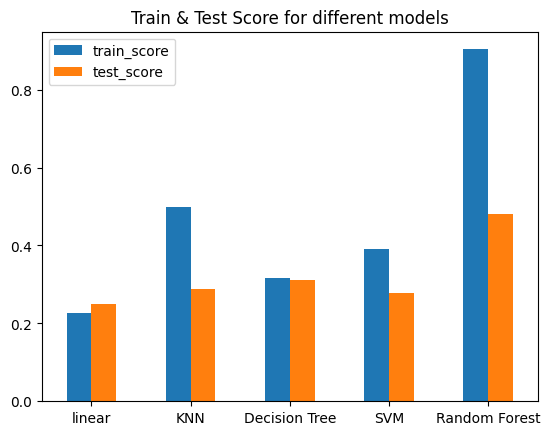

In [ ]:
# Comparison R_SCORE

train_score = [lm_train_score, knn_train_score, dt_train_score, svm_train_score, rf_train_score]
test_score =[lm_test_score, knn_test_score, dt_test_score, svm_test_score, rf_test_score]
label =['linear', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

df_score = pd.DataFrame({'train_score': train_score,
                   'test_score': test_score}, index=label)

df_score.plot.bar(rot=0, title ='Train & Test Score for different models')

In [ ]:
# Use the best model to make prediction on test data
y_pred = rf_reg.predict(X_test)
y_pred

array([345960.41626268, 393755.32247136, 361368.11078394, 408222.34654845,
       388070.77362023, 231268.81333676, 363670.27810924, 410373.2899244 ,
       368077.67481108, 347677.23505896, 336192.05653242, 411317.33786442,
       368890.17178662, 252425.76265812, 355010.85140856, 401077.64175094,
       320037.9863209 , 314422.56756777, 403213.95110021, 338501.89141306,
       211191.983458  , 448414.61537793, 358650.26105114, 416166.54840237,
       342535.00589957, 366778.30698924, 348649.12680668, 453309.55483488,
       268856.09253549, 356030.96323607, 332392.56403451, 416769.98219367,
       314864.44120261, 375692.86734457, 270993.88714937, 204000.75724645,
       334946.29277924, 334751.84591297, 220737.34847375, 244608.05525641,
       251977.62477372, 409929.95618983, 357731.04398565, 269461.49886289,
       351777.81736728, 345646.29823655, 386387.43416722, 383546.09089943,
       339337.36341968, 261863.98266237, 316524.52781881, 268465.20781889,
       250712.8954163 , 2

### Step 3: Recommend the Best Model and Explain the Reasons

In [ ]:
#??lm_reg.score

Enter your answer here:



In [ ]:
# Enter your code here (if required):




### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. 95% confidence interval, visualization tools and etc.)

In [ ]:

#df_mae.plot.bar(rot=0, title ='Train & Test MAE for different models')

In [ ]:
# Enter your code here:

confusion_matrix(svm_reg, X_test, y_test, values_format ='d')


TypeError: confusion_matrix() got an unexpected keyword argument 'values_format'

### Step 5: Save the Best Model for Future Use

In [ ]:
# Enter your code here:
print(accuracy_score(X_test, y_test))
param_grid.get_parameters()
#y_train

upper_limit = house['sqft_lot'].mean() + 3 * house['sqft_lot'].std()
lower_limit = house['sqft_lot'].mean() - 3 * house['sqft_lot'].std()
house = house[(house['sqft_lot'] < upper_limit) & (house['sqft_lot'] > lower_limit)]
print(house)

#f'shape of X={X_train.shape} y= {y_train.shape}, #price={y.sum()}'

In [ ]:
rdg_reg = Ridge()
rdg_reg.fit(X_train,y_train)
param_grid = {"alpha": [0.001,0.01,0.00001,0.1,1,2,3,4,5,6]}
rdg_grid_reg = GridSearchCV(rdg_reg,
                      param_grid=param_grid,
                      cv= 3,
                      refit='recall',
                      n_jobs=-1)
rdg_reg.fit(X_train,y_train)



In [ ]:
y_prd = rdg_reg.predict(X_train)

In [ ]:
#training mean absolute error
rdg_train_mae = mean_absolute_error(rdg_reg.predict(X_train), y_train)
print('Linear Regression mean absolute error: ', rdg_train_mae)

#testing mean absolute error
rdg_test_mae = mean_absolute_error(rdg_reg.predict(X_test), y_test)
print('Linear Regression mean absolute error: ', rdg_test_mae)

In [ ]:
rdg_train_score = rdg_reg.score(X_train, y_train)
print('Linear Regression Score: ', rdg_train_score)

rdg_test_score = rdg_reg.score(X_test, y_test)
print('Linear Regression Score: ', rdg_test_score)

In [ ]:
#knn model
mod = IsolationForest().fit(X_train)
np.where(mod.predict(X_train) == -1, 1, 0)
rf_reg = neighbors.KNeighborsRegressor()
def min_recall_precision (est,X,y_test,sameple_weight=None):
  y_pred = est.predict(X)
  recall= recall_score(y_test, y_pred)
  precision = precision_score(y_true, y_pred)
  return min(recall, precision)

def outlier_precision(mod, X ,y):
  preds = mod.predict(X)
  return recall_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
  preds = mod.predict(X)
  return recall_score(y, np.where(preds == -1,1,0))


plt.figure(figsize=(32,4))
pd.DataFrame(gs_reg.cv_results_)
#for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
#  plt.plot([_[1] for _ in house['price']],
#           house[score],
#           label=score)
plt.legend();

In [ ]:
svm_reg = svm.SVR(kernel='linear')
svm_reg.fit(X_train, y_train)
predictions = svm_reg.predict(X_train)
svm_reg.fit(X_train, y_train)

In [ ]:
print(svm_reg.score(X_train, y_train))
print(svm_reg.score(X_test, y_test))


In [ ]:
#Using test data & Visualize y_test & y_test_pred
y_test_pred = lm_reg.predict(X_test)
lm_reg.fit(X_test, y_test)
plt.scatter( y_test,y_test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [ ]:
print(r2_score(y_test, y_test_pred))
print('Intercept: ',lm_reg.intercept_)
print('coefficients: ',lm_reg.coef_)



## <center>End of Assignment<center>
---

In [ ]:
#ax = house[['sqft_living', 'price']].boxplot(by='sqft_living', figsize = (6,6))
#print(house.columns)
#house['price'][0:501]
#house.iloc[2,5]
#for index, row in df.itterows()
#print(index,row['price'])
#house.loc[house['floors'] == '2']
#house.sort_values(['city','price']) ascending order : ascending=[1,0]
#house['Total'] = house['price']
#house2 = house.iloc[:, 1:2].sum(axis=1)
#cols = list(house.columns)
#house = house[cols[0:5]]
#df.to_csv('modified.csv ')  to text + ('modified.txt, index = False, sep = '\t')
#house.loc(house['condition'] == 3)